In [3]:
!pip install datasets

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 521.2/521.2 kB 8.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 11.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 14.9 MB/s eta 0:00:00


In [1]:
from datasets import load_dataset
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt

d:\anaconda3\envs\EECS595project\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# Preprocess Dataset

## Finetune Datasets

In [ ]:
dataset = load_dataset("ai2_arc", 'ARC-Challenge')

In [ ]:
print(dataset)

DatasetDict({
    train: Dataset({
        features: ['id', 'question', 'choices', 'answerKey'],
        num_rows: 1119
    })
    test: Dataset({
        features: ['id', 'question', 'choices', 'answerKey'],
        num_rows: 1172
    })
    validation: Dataset({
        features: ['id', 'question', 'choices', 'answerKey'],
        num_rows: 299
    })
})


In [ ]:
train_ds = dataset["train"]
valid_ds = dataset["validation"]
test_ds = dataset["test"]
print(train_ds)

Dataset({
    features: ['id', 'question', 'choices', 'answerKey'],
    num_rows: 1119
})


In [ ]:
def transform_arc_dataset(dataset, instruction_prompt):
    """
    Transforms the ARC dataset into the specified Pandas DataFrame format.

    Parameters:
    dataset (list): A list of dictionaries, each representing a question in the ARC dataset.

    Returns:
    pd.DataFrame: A DataFrame with two columns as specified.
    """
    transformed_data = []

    for entry in dataset:
        # Extracting question and choices
        question = entry['question']
        choices = entry['choices']['text']
        labels = entry['choices']['label']
        answer_key = entry['answerKey']

        # Formatting Column 1: Question and Choices
        formatted_question = instruction_prompt + question + "\n" + "\n".join([f"{label}. {choice}" for label, choice in zip(labels, choices)])

        # Formatting Column 2: Answer Key and Corresponding Choice
        answer_index = labels.index(answer_key)
        formatted_answer = f"{answer_key}. {choices[answer_index]}"

        # Appending the formatted data
        transformed_data.append([formatted_question, formatted_answer])

    # Creating a DataFrame
    df = pd.DataFrame(transformed_data, columns=['Question and Choices', 'Answer'])

    return df

In [ ]:
instruction = """Based on the question, analyze each option and select the most appropriate answer. Please provide a final answer to the question.\n"""
train_df = transform_arc_dataset(train_ds, instruction)
valid_df = transform_arc_dataset(valid_ds, instruction)
test_df = transform_arc_dataset(test_ds, instruction)

In [ ]:
print(train_df.iloc[0,0])

Based on the question, analyze each option and select the most appropriate answer. Please provide a final answer to the question.
George wants to warm his hands quickly by rubbing them. Which skin surface will produce the most heat?
A. dry palms
B. wet palms
C. palms covered with oil
D. palms covered with lotion


In [ ]:
print(train_df.head(2))
print(valid_df.head(2))
print(test_df.head(2))

                                Question and Choices  \
0  Based on the question, analyze each option and...   
1  Based on the question, analyze each option and...   

                                    Answer  
0                             A. dry palms  
1  B. The refrigerator door contains iron.  
                                Question and Choices  \
0  Based on the question, analyze each option and...   
1  Based on the question, analyze each option and...   

                                        Answer  
0  D. Record the details of the investigation.  
1                                   C. drought  
                                Question and Choices  \
0  Based on the question, analyze each option and...   
1  Based on the question, analyze each option and...   

                                   Answer  
0  C. Planetary days will become shorter.  
1         B. buildings will be made safer  


In [ ]:
train_df.to_csv('../data/train_df-arc_challenge.csv', index=False)
valid_df.to_csv('../data/valid_df-arc_arc_challenge.csv', index=False)
test_df.to_csv('../data/test_df-arc_arc_challenge.csv', index=False)

## Pretrain Data

In [54]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
courpus_path = r"./ARC_Corpus.txt"

In [7]:
def process_large_file(file_path):
    with open(file_path, "r", encoding="utf-8") as file:
        corpus = [line.strip("\n") for line in file.readlines()]
    pd.DataFrame(corpus).to_csv(r"./ARC_corpus.csv", header=False, index = False)


process_large_file(courpus_path)

In [8]:
corpus_csv_path = r"./ARC_corpus.csv"
corpus_df = pd.read_csv(corpus_csv_path, header = None)

In [9]:
pd.set_option('display.max_colwidth', None)
print(corpus_df.head(20))

                                                                                                                                                                                                                                                                                                                                                               0
0                                                                                                                                                                                                                                                          Large international companies are involved in bauxite, iron ore, diamond, and gold mining operations.
1                                                                                                                                                                                                                                                                                                     

In [ ]:
# Assuming your DataFrame is named df and the column is named 'column_name'
# text_to_check = "The force of gravity overcomes the"
text_to_check = "will use magnets to explore how gravity"
# exists = text_to_check in corpus_df.values.squeeze(1)
corpus_data = corpus_df.values.squeeze(1)
results = [entry for idx, entry in enumerate(corpus_data) if text_to_check in entry]
for idx, entry in enumerate(corpus_df.values.squeeze(1)):
    if text_to_check in entry:
        print(idx, entry)

28957 Then the super cool part- children will use magnets to explore how gravity can easily be overcome by other forces- almost like defying gravity!


In [ ]:
print(corpus_data[1000])

Thus, when we see such strata inclined instead of horizontal, evidence of an episode of deformation.


In [ ]:
print(corpus_df.values.squeeze(1)[:10])

['Large international companies are involved in bauxite, iron ore, diamond, and gold mining operations.\n'
 'Paleoceanography, 8(2): 193-208.\n'
 'Of course, for many in the media, “hydrogen sulphide delivery helps prevent disease damage in cells in certain disease models” will always be trumped by “farts cure cancer” when it comes to headlines.\n'
 'The same problems apply with wolf-domestic dog hybrids.\n'
 'taking stock of delightful days\n'
 'The an- tlu-opologist and the ethnologist find in trop- ical America some of the most complicated and interesting problems of research.\n'
 'ORDER ODONATA (Damselflies and Dragonflies) Diagnosis: large, to over three inches long; four wings, transparent and membranous, held vertically (damselflies) or laterally (dragonflies) at rest; chew- ing mouth parts, tooth-like; nymphs aquatic, feeding on mosquito larvae to small fish; adults terrestrial, feeding on other insects (Figure 14.27).\n'
 'until they institute such safeguards and assurances of

In [ ]:
corpus_df.__len__

<bound method DataFrame.__len__ of                                                                                                                                                                                                                                                                                                           0
0                                                                                                                                                                                                     Large international companies are involved in bauxite, iron ore, diamond, and gold mining operations.
1                                                                                                                                                                                                                                                                          Paleoceanography, 8(2): 193-208.
2                                                                

In [11]:
corpus_df.columns=['sentence']
corpus_df.head()

,sentence
0,"Large international companies are involved in bauxite, iron ore, diamond, and gold mining operations."
1,"Paleoceanography, 8(2): 193-208."
2,"Of course, for many in the media, “hydrogen sulphide delivery helps prevent disease damage in cells in certain disease models” will always be trumped by “farts cure cancer” when it comes to headlines."
3,The same problems apply with wolf-domestic dog hybrids.
4,taking stock of delightful days


### check for length


In [ ]:
# Split sentences into words and count them
#corpus_df['sentence_length'] = corpus_df['sentence'].str.split().str.len()


In [ ]:
#corpus_df.to_csv(r"./ARC_corpus.csv",index=False)

In [39]:
corpus_csv_path = r"./ARC_corpus.csv"
corpus_df= pd.read_csv(corpus_csv_path)
corpus_df.head()

,sentence,sentence_length
0,"Large international companies are involved in bauxite, iron ore, diamond, and gold mining operations.",14
1,"Paleoceanography, 8(2): 193-208.",3
2,"Of course, for many in the media, “hydrogen sulphide delivery helps prevent disease damage in cells in certain disease models” will always be trumped by “farts cure cancer” when it comes to headlines.",33
3,The same problems apply with wolf-domestic dog hybrids.,8
4,taking stock of delightful days,5


### delete selected sample

In [40]:
df1= pd.read_csv("./fillered2.csv")
df2= pd.read_csv("./filleted1000.csv")
df3= pd.read_csv("./filleted1500.csv")
df4 = pd.read_csv("./1.5k_complete1.csv")

In [41]:
overlapping_indices = corpus_df.index.intersection(df1.index)
corpus_df = corpus_df.drop(overlapping_indices)

In [42]:
overlapping_indices = corpus_df.index.intersection(df2.index)
corpus_df = corpus_df.drop(overlapping_indices)

In [43]:
overlapping_indices = corpus_df.index.intersection(df3.index)
corpus_df = corpus_df.drop(overlapping_indices)

In [44]:
overlapping_indices = corpus_df.index.intersection(df4.index)
corpus_df = corpus_df.drop(overlapping_indices)

In [45]:
corpus_df.head()

,sentence,sentence_length
1500,If these factors are integrated - late sexual maturity with small litter sizes and a long pregnancy time - it is by no means surprising that excessive fishing has a destructive influence on spiny dogfish populations.,36
1501,"First, they must have a serious desire to die.",9
1502,Microbiology 2009;155(Pt 7):2411-2419.,3
1503,LB: ability to change behavior based on experience,8
1504,"I think we've been drawn to keeping the set more fast-paced.""",11


<Axes: xlabel='sentence_length'>

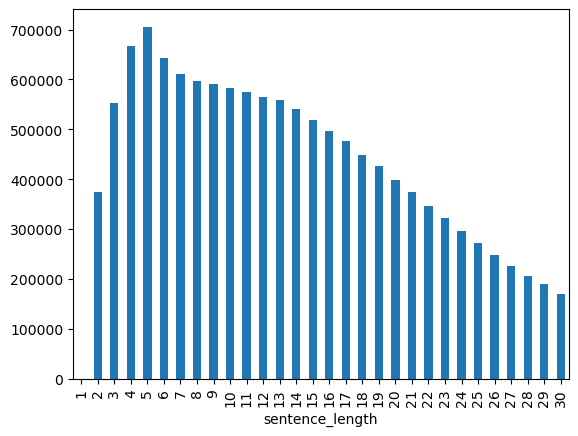

In [46]:
corpus_df['sentence_length'].value_counts().sort_index()[:30].plot(kind='bar')

In [47]:
corpus_df[corpus_df.sentence_length>=182]

,sentence,sentence_length
1991,"Land bounded by the following UTM Zone 12 NAD 83 coordinates (meters E, meters N): 514911, 3577908; 514911, 3579513; 513299, 3579494; 513301, 3579425; 510084, 3579429; 510070, 3587414; 513203, 3587409; 513213, 3587806; 515756, 3587828; 515737, 3595910; 515769, 3597398; 515771, 3597455; 515781, 3597458; 516364, 3597456; 516348, 3601612; 523670, 3601584; 523700, 3601584; 523847, 3601583; 524718, 3601580; 524888, 3601579; 525226, 3601578; 527106, 3601570; 527602, 3601568; 527599, 3599823; 527598, 3599046; 527596, 3597485; 529153, 3597489; 530166, 3597492; 530166, 3597448; 530150, 3595953; 530150, 3595894; 530144, 3593493; 530143, 3592692; 530139, 3591088; 533840, 3591100; 533896, 3591100; 533896, 3591090; 533914, 3584720; 537057, 3584724; 537129, 3584724; 537129, 3584720; 537164, 3578312; 541921, 3578321; 541989, 3578322; 541995, 3575111; 541995, 3575108; 543529, 3575115; 544714, 3575120; 545213, 3575122; 545219, 3571911; 545604, 3571911; 545611, 3571911; 546758, 3571911; 548441, 3571912; 548448, 3570312; 548455, 3568714; 550368, 3568713; 550462, 3552466; 550386, 3552469; 550393, 3549425; 550123, 3549406; 550131, 3546085; 547604, 3546045; 547604, 3546045; 546823, 3546033; 544053, 3545989; 544053, 3545989; 543676, 3545983; 543593, 3545982; 542799, 3545971; 542107, 3545961; 542105, 3546739; 542099, 3548862; 539055, 3548865; 538961, 3552054; 538960, 3552062; 538960, 3552079; 538930, 3558568; 532696, 3558536; 531089, 3558591; 529459, 3558562; 529446, 3566577; 529443, 3568326; 527829, 3568335; 527814, 3570720; 527779, 3576331; 523008, 3576308; 523011, 3576333; 518112, 3576344; 516500, 3576333; 516451, 3576332; 514910, 3576301; 514911, 3577908.",201
12882,Sc SDttHM Ti TTTUtHJM 23 V Cr 23 Mn Fe 27 Co CCKU.T n Ni WttEL 29 Cu town 10 Zn DK 31 Ga H11UI aa Ge Vt.tli As usewc 34 Se 39 Br Kr 31 Rb 3* Sr as Y mm* 4* Zr smouuM 41 Nb ■WW 42 Mo IHLYgCiEHLII 43 Tc 44 Ru 4B Rh 46 Pd 47 sunn 4B Cd uouuu 49 In 50 Sn IH 51 Sb IHTIUDhT 52 Te 1ELLUHIUM S3 I B4 Xe tH.ru nmi BS Cs a hum BS Ba IMM 57-71 La-Lu umwm 22 Hf H1FMJU 73 Ta UHUlUU 24 w TUHCSm 75 Re hmhuu 26 Os 77 lr IB Pt punuu 79 All raw BO UtHOlHT ai Tj Pb B3 Bi SSHFIK 84 Po ■a At HTJWHE Rn B7 Fr FUHCMI aa Ra B9- 103 Ac-Lr 101 Rf 109 Db I OB 107 Bh IffB Hs HISEMI 109 Mt U[|TH[RIUM Ds in HE Cn 113 Uut MMM 114 Uuq 11B Uup US Uuh 117 Uus us Uuo La Ce Pr Nd Pm Sm Eu Gd Tb Dy Ho Er Tm Yb Lu Ac Th Pa U Pu Am Cm Bk Cf Es Fm Md No Lr Figure 2.1: Periodic Table of the Elements.,202
13568,"I. Evaluation MATC Values of Fungicide Thiram (Metode de Deter- minare a Valorilor Maxime Admisibile (MATC) in Apa a Unor Pesticide Asupra Unor Specii de Pesti Dulcicoli I. Determinarea Valorii MATC a Fungicidului Tiuram), W85-03531 1807 5C Simple Cultivation Unit for the Evaluation of Algal Growth Potential and Toxicity of Water, W85-04983 1810 7B Quantitative Structure-Activity Relationships and Mixture Toxicity of Organic Chemicals in Photobacterium phosphoreum: The Microtox Test, W85-05809 1810 5C Role of Immunoassay in the Analysis of Micro- contaminants in Water Samples, W85-05811 1810 5A Toxic Impact of Effluents from Petrochemical Industry, W85-05812 1810 5C Combined Action of Carbaryl and Phenthoate on Tissue Lipid Derivatives of Murrel, Channa punctatus (Bloch), W85-05813 1810 5C Effects of Various Organic Chemicals on the Regreening of Red Colored Chlorella zofingien- Rapid BOD Measurement for Municipal Wastewater Samples using a Biofilm Electrode, W85-01739 1804 5D Role of Benthic Films in the Oxygen Balance in an East Devon River, W85-02426 1805 5C W85-05814 1810 5A Use of the Aurelia Metamorphosis Test System to Detect Subtle Effects of Selected Hydrocar- bons and Petroleum Oil, W85-05890 1811 5C Effects of Toxic Chemicals on Macrophage Phagocytosis in Two Estuarine Fishes, W85-05891 1811 5C Acute Lethal Toxicity of Prudhoe Bay Crude Oil and Corexit 9527 to Arctic Marine Fish and Invertebrates, W85-06970 1812 5C BIOAVAILABILITY Biological Availability of Soluble Reactive Pho

In [48]:
df_filtered = corpus_df[~corpus_df['sentence'].str.contains("\?")]
df_filtered = df_filtered[~df_filtered['sentence'].str.contains("herf")]
df_filtered = df_filtered[~df_filtered['sentence'].str.contains("-RCB")]

In [49]:
df_filtered = df_filtered[(df_filtered.sentence_length>=21) & (df_filtered.sentence_length<=30)]
df_filtered

,sentence,sentence_length
1519,", n. f. Si(si 2 )-a 2 l(a 3 l)-o a s'ke a (ch a e a )-si a s. Gen., -es'eos (-osch'eais).",23
1522,_ This phenomenon raises serious questions as to whether a fully charged memory bank in a newborn animal is an evolutionary characteristic.,22
1528,"You can look in the lab manual for diagnostic traits for each phylum, but the point is that diagnostic traits are difficult to identify in all cases.",27
1545,"Ind 90:248 ]My 5 '17 Bruner, S. C, and Brimley, C. S. Spring migration of 1915 at Raleigh, N. C. Bird Lore 18:85-7 Mr '16 Bruner, Warren D. One-man business.",30
1546,"We are proud to announce this jewellery design competition to celebrate the iconic and famous Australian South Sea Pearl and the talents of Australia’s Jewellers, Silver and Goldsmiths.",28
...,...,...
14621831,"Large quantities of hydrogen are used in the Haber process (production of ammonia), hydrogenation of fats and oils, methanol production, hydrocracking, and hydrodesulfurization.",23
14621835,"Moreover, it provides sanctuary to a variety of salt marsh organisms, both terrestrial and aquatic; twice daily, these plants are covered by tidal waters; creating two habitats.",27
14621836,"Mountainous and subalpine zones up to 2,000 metres in the South Island were the stronghold of the upland moa, along with the crested moa.",24
14621840,"If you plan on growing dill for its seeds, harvest seeds around mid-summer when the seed is ripe, carefully gather and cut the stalks.",24


In [50]:
pd.set_option('display.max_colwidth', None)

In [51]:
df_filtered.head(50)

,sentence,sentence_length
1519,", n. f. Si(si 2 )-a 2 l(a 3 l)-o a s'ke a (ch a e a )-si a s. Gen., -es'eos (-osch'eais).",23
1522,_ This phenomenon raises serious questions as to whether a fully charged memory bank in a newborn animal is an evolutionary characteristic.,22
1528,"You can look in the lab manual for diagnostic traits for each phylum, but the point is that diagnostic traits are difficult to identify in all cases.",27
1545,"Ind 90:248 ]My 5 '17 Bruner, S. C, and Brimley, C. S. Spring migration of 1915 at Raleigh, N. C. Bird Lore 18:85-7 Mr '16 Bruner, Warren D. One-man business.",30
1546,"We are proud to announce this jewellery design competition to celebrate the iconic and famous Australian South Sea Pearl and the talents of Australia’s Jewellers, Silver and Goldsmiths.",28
1563,Exploration and mapping activities in and around the sanctuary have led to an updated habitat classification scheme for the Northwestern Gulf of Mexico.,23
1578,"I found Pam and Damon very supportive in the transition for my son, sending me text updates with pictures, so I could see how he was doing.",27
1582,"It as nothing to do with social ties, but rather with a concentration of their favored foods on that specific location.",21
1594,"buy avodart online canada The morning after his Triple-A Las Vegas 51s were bounced from the Pacific Coast League playoffs last year, the big righthander checked his p..",28
1597,"This is one of the themes in male dreams, showing how the man is at the mercy of his sexual desires for a woman.",24


In [52]:
sampled_df = df_filtered.groupby('sentence_length').apply(lambda x: x.sample(1000)).reset_index(drop=True)

In [53]:
sampled_df

,sentence,sentence_length
0,They should not be used often because it will upset the balance of the natural bacteria that are in the vagina.,21
1,the period of fertility if 4 to 8 days after the lh hormone spike which can be determined by your veterinarian.,21
2,Links The SITE may automatically produce search results that reference or link to third party sites throughout the World Wide Web.,21
3,"Dumbledore appears in an episode of Icons of Teen from the YouTube channel, Shut Up Cartoons voiced by Justin Roiland .",21
4,The last three segments of the cephalon and the first three segments of the thorax are where the mouthparts are located.,21
...,...,...
9995,Eel Management Plans (EMPs) have been developed in European countries since 2007 as a stipulation of the EU Council Regulation No 1100/2007 relating to the recovery of the European Eel.,30
9996,"Beginning ca. 1300 B.C., the Lapita pottery-makers expanded rapidly beyond the Solomons and into the southwestern archipelagoes of Remote Oceania: Vanuatu, the Loyalty Islands, New Caledonia, Fiji, Tonga, and Samoa.",30
9997,"This appears to contrast “genetic conservatism” [ 91 ], and might be explained in the same way as aging in multicellular organisms [ 1 , 58 ] (see point (7)).",30
9998,"If the mites help to reduce the maggot population and thus reduce competition for the beetle, they may actually be benefiting the beetle and thus move this relationship into mutualism.",30


### kmeans

In [54]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize TF-IDF Vectorizer
vectorizer = TfidfVectorizer(max_features=1000)  # You can adjust the number of features

# Apply TF-IDF to your data
tfidf_matrix = vectorizer.fit_transform(sampled_df['sentence'])

In [55]:
from sklearn.decomposition import PCA
pca = PCA(n_components=100)
reduced_feature= pca.fit_transform(tfidf_matrix.toarray())

In [56]:
from sklearn.cluster import KMeans

# Number of clusters
n_clusters = 100  # This is an example; adjust based on your dataset

# Perform K-Means clustering
kmeans = KMeans(n_clusters=n_clusters, random_state=0)
clusters = kmeans.fit_predict(reduced_feature)

d:\anaconda3\envs\EECS595project\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [57]:
import numpy as np

# Select samples from each cluster
selected_indices = []
for i in range(1500):
    cluster_indices = np.where(clusters == (i% 100))[0]
    selected_indices.extend(np.random.choice(cluster_indices, size=1))  # Change size based on how many you want from each cluster

# Create the final dataset
final_df = df_filtered.iloc[selected_indices].sample(n=1500, random_state=66)  # Randomly select 1,000 rows from the chosen samples

In [58]:
final_df

,sentence,sentence_length
15925,"methocarbamol 500 mg uses Andrew Wilson, a spokesman for Fannie Mae, said the financegiant is focusing on ""strategic defaulters:"" those who couldhave paid their mortgages but did not",28
11368,"Although a song sequence may change with the seasons, at any one time all the animals in the same area will produce the same song.",25
11084,"Immediately thrown into the Mauthausen concentration camp, Salomon exhibits exceptional skills there and is soon transferred to the upgraded camp of Sachsenhausen.",22
29120,"Every attempt should be made to keep water free of flying insects, as well as any type of build up of food, hair, feces, fur, etc.",26
34924,"Abstracts, very closely allied to concepts, can be defined as _a thought apart from any particular object or real thing not concrete, but somehow related to it_.",27
...,...,...
55721,"There can be a downside in living in a beautiful area like Byron Shire, for example for people who want to work or relax in our beautiful outdoors.",28
55518,"The large Massachusetts Champion Elm stands on Summer Street in the Berkshire County town of Lanesborough, Massachusetts has been kept alive by antifungal treatments.",24
33106,At the age of fourteen she received a scholarship to the Boston Ballet School and became an apprentice to the Company at age 15.,24
27513,"Shelves should be arranged so that there are no uninterrupted heights of 60cm or more to avoid injury from falls (Saunders, 2009).",22


In [59]:
final_df["sentence"].to_csv("1.5k_data2.csv",index= False)

In [60]:
final_df.to_csv("1.5k_complete2.csv")